In [1]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

In [2]:
#expland the display to show all columns
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

In [3]:
#load data
mydata = pd.read_csv('merged_data.csv')

In [4]:
#look at data
mydata


,Unnamed: 0,Year,Month,ISHMT,discharge_rate,date,County,PM2.5,PM10
0,0,2020,6,Acute upper respiratory infections & influenza...,0.020226,2020-06-01,Cork,2.449595,4.925600
1,1,2020,7,Acute upper respiratory infections & influenza...,0.023597,2020-07-01,Cork,2.918698,8.976464
2,2,2020,8,Acute upper respiratory infections & influenza...,0.038767,2020-08-01,Cork,5.503203,11.047632
3,3,2020,9,Acute upper respiratory infections & influenza...,0.062364,2020-09-01,Cork,5.348747,11.373366
4,4,2020,10,Acute upper respiratory infections & influenza...,0.038767,2020-10-01,Cork,6.587163,12.050000
...,...,...,...,...,...,...,...,...,...
597,597,2023,8,Pneumonia (J12-J18),0.190482,2023-08-01,Dublin,4.065971,8.849873
598,598,2023,9,Pneumonia (J12-J18),0.179160,2023-09-01,Dublin,7.197300,13.106326
599,599,2023,10,Pneumonia (J12-J18),0.238436,2023-10-01,Dublin,6.902304,13.438059
600,600,2023,11,Pneumonia (J12-J18),0.265743,2023-11-01,Dublin,7.755754,13.776940


In [5]:
#look at structure
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      602 non-null    int64  
 1   Year            602 non-null    int64  
 2   Month           602 non-null    int64  
 3   ISHMT           602 non-null    object 
 4   discharge_rate  602 non-null    float64
 5   date            602 non-null    object 
 6   County          602 non-null    object 
 7   PM2.5           602 non-null    float64
 8   PM10            602 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 42.5+ KB


In [6]:
#drop first col not needed
mydata.drop(mydata.columns[0], axis=1, inplace=True)

In [7]:
mydata

,Year,Month,ISHMT,discharge_rate,date,County,PM2.5,PM10
0,2020,6,Acute upper respiratory infections & influenza...,0.020226,2020-06-01,Cork,2.449595,4.925600
1,2020,7,Acute upper respiratory infections & influenza...,0.023597,2020-07-01,Cork,2.918698,8.976464
2,2020,8,Acute upper respiratory infections & influenza...,0.038767,2020-08-01,Cork,5.503203,11.047632
3,2020,9,Acute upper respiratory infections & influenza...,0.062364,2020-09-01,Cork,5.348747,11.373366
4,2020,10,Acute upper respiratory infections & influenza...,0.038767,2020-10-01,Cork,6.587163,12.050000
...,...,...,...,...,...,...,...,...
597,2023,8,Pneumonia (J12-J18),0.190482,2023-08-01,Dublin,4.065971,8.849873
598,2023,9,Pneumonia (J12-J18),0.179160,2023-09-01,Dublin,7.197300,13.106326
599,2023,10,Pneumonia (J12-J18),0.238436,2023-10-01,Dublin,6.902304,13.438059
600,2023,11,Pneumonia (J12-J18),0.265743,2023-11-01,Dublin,7.755754,13.776940


## Linear Regression
#### Build for mydata_pre_feb2022 (up to the end of the COVID restrictions)

In [8]:
#convert categorical variables and drop PM10 
mydata_2022_encoded = pd.get_dummies(mydata, columns=['ISHMT', 'County',], drop_first=True)
mydata_2022_encoded = mydata_2022_encoded.drop(columns=['PM2.5'])
#split data into covid and post-covid
mydata_pre_feb2022 = mydata_2022_encoded[mydata_2022_encoded['date']<'2022-02-01']
mydata_post_feb2022 = mydata_2022_encoded[mydata_2022_encoded['date']>='2022-02-01']


In [9]:
#get rid of date and PM10 
mydata = mydata_pre_feb2022.drop(columns=['date'])

#sort X (features) and y (target)
X = mydata.drop(columns=['discharge_rate'])
y = mydata['discharge_rate']

#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalise the data - and fit to train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model
model_pre = LinearRegression()
model_pre.fit(X_train_scaled, y_train)

#predict on the test set
y_pred = model_pre.predict(X_test_scaled)

#evaluate the model using 'mean squared error' (mse)
mse = mean_squared_error(y_test, y_pred)

#outputs
print(f"Mean Squared Error: {mse:.5f}")
print(f"Intercept: {model_pre.intercept_}")
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

#keep original feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

#add intercept
X_train_sm = sm.add_constant(X_train_scaled_df)

#fit the model and print summary
ols_model_pre = sm.OLS(y_train, X_train_sm).fit()
print(ols_model_pre.summary())

Mean Squared Error: 0.00283
Intercept: 0.11795524534183345
Root Mean Squared Error (RMSE): 0.05321153897439557
Mean Absolute Error (MAE): 0.03062651333674274
                            OLS Regression Results                            
Dep. Variable:         discharge_rate   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     25.97
Date:                Sat, 17 May 2025   Prob (F-statistic):           2.40e-30
Time:                        21:29:33   Log-Likelihood:                 330.30
No. Observations:                 196   AIC:                            -638.6
Df Residuals:                     185   BIC:                            -602.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    

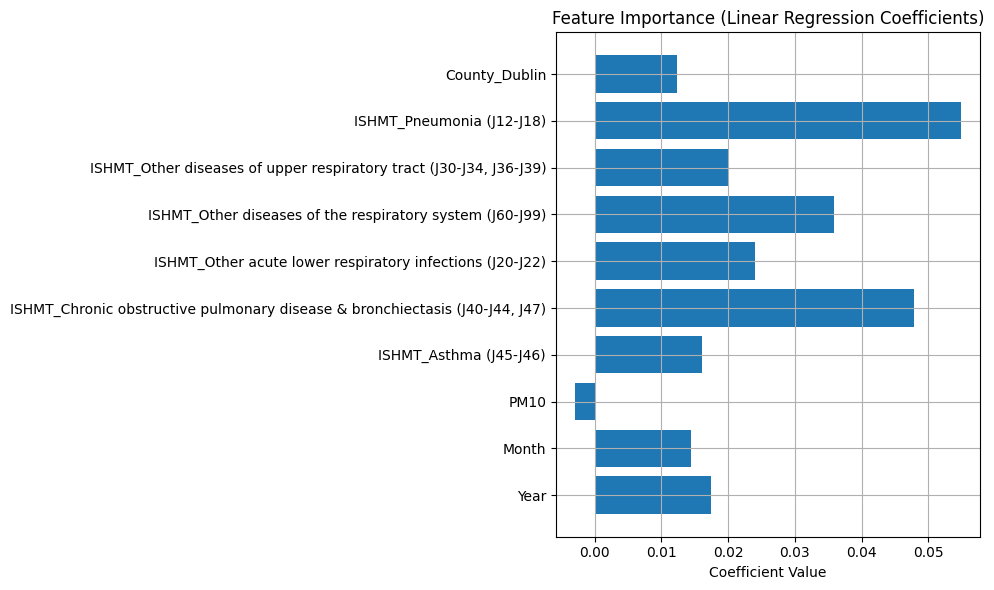

In [10]:
#feature importance from linear regression
feature_names = X.columns
coefficients = model_pre.coef_

#show it on a plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

##### drop the non-significant features

In [11]:
#get rid of pm2.5 and pm10 for the COVID version
mydata_pre_feb2022 = mydata_pre_feb2022.drop(columns=['PM10'])

mydata = mydata_pre_feb2022

#get rid of date it is not needed
mydata = mydata.drop(columns=['date'])

#sort X (features) and y (target)
X = mydata.drop(columns=['discharge_rate'])
y = mydata['discharge_rate']

#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalise the data - and fit to train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model
model_pre_drop = LinearRegression()
model_pre_drop.fit(X_train_scaled, y_train)

#predict on the test set
y_pred = model_pre_drop.predict(X_test_scaled)

#evaluate the model using 'mean squared error' (mse)
mse = mean_squared_error(y_test, y_pred)

#outputs
print(f"Mean Squared Error: {mse:.5f}")
print(f"Intercept: {model_pre_drop.intercept_}")
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

#keep original feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

#add intercept
X_train_sm = sm.add_constant(X_train_scaled_df)

#fit the model and print summary
ols_model_pre_drop = sm.OLS(y_train, X_train_sm).fit()
print(ols_model_pre_drop.summary())

Mean Squared Error: 0.00280
Intercept: 0.11795524534183364
Root Mean Squared Error (RMSE): 0.05291945792159974
Mean Absolute Error (MAE): 0.03050937439658329
                            OLS Regression Results                            
Dep. Variable:         discharge_rate   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     28.85
Date:                Sat, 17 May 2025   Prob (F-statistic):           5.77e-31
Time:                        21:29:48   Log-Likelihood:                 329.98
No. Observations:                 196   AIC:                            -640.0
Df Residuals:                     186   BIC:                            -607.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                    

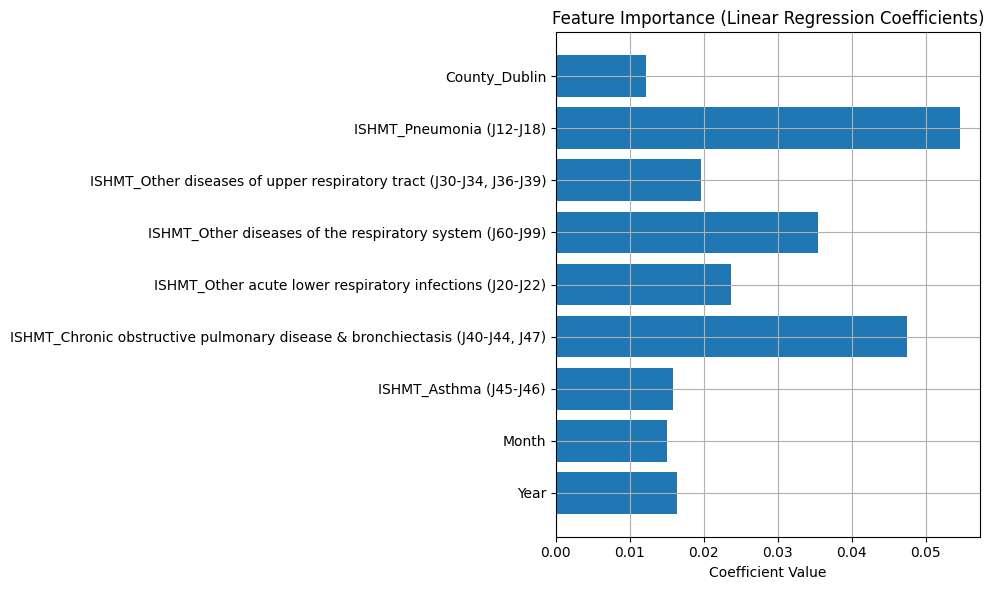

In [12]:
#feature importance from linear regression
feature_names = X.columns
coefficients = model_pre_drop.coef_

#show it on a plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Build for mydata_post_feb2022 (after end of the COVID restrictions)

In [13]:
mydata = mydata_post_feb2022

#get rid of date it is not needed
mydata = mydata.drop(columns=['date'])

#sort X (features) and y (target)
X = mydata.drop(columns=['discharge_rate'])
y = mydata['discharge_rate']

#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalise the data - and fit to train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model
model_post = LinearRegression()
model_post.fit(X_train_scaled, y_train)

#predict on the test set
y_pred = model_post.predict(X_test_scaled)

#evaluate the model using 'mean squared error' (mse)
mse = mean_squared_error(y_test, y_pred)

#outputs
print(f"Mean Squared Error: {mse:.5f}")
print(f"Intercept: {model_post.intercept_}")
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

#keep original feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

#add intercept
X_train_sm = sm.add_constant(X_train_scaled_df)

#fit the model and print summary
ols_model_post = sm.OLS(y_train, X_train_sm).fit()
print(ols_model_post.summary())

Mean Squared Error: 0.00195
Intercept: 0.15313319070222176
Root Mean Squared Error (RMSE): 0.04420164903344556
Mean Absolute Error (MAE): 0.031168276927591533
                            OLS Regression Results                            
Dep. Variable:         discharge_rate   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     25.61
Date:                Sat, 17 May 2025   Prob (F-statistic):           1.46e-31
Time:                        21:29:59   Log-Likelihood:                 377.98
No. Observations:                 225   AIC:                            -734.0
Df Residuals:                     214   BIC:                            -696.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                   

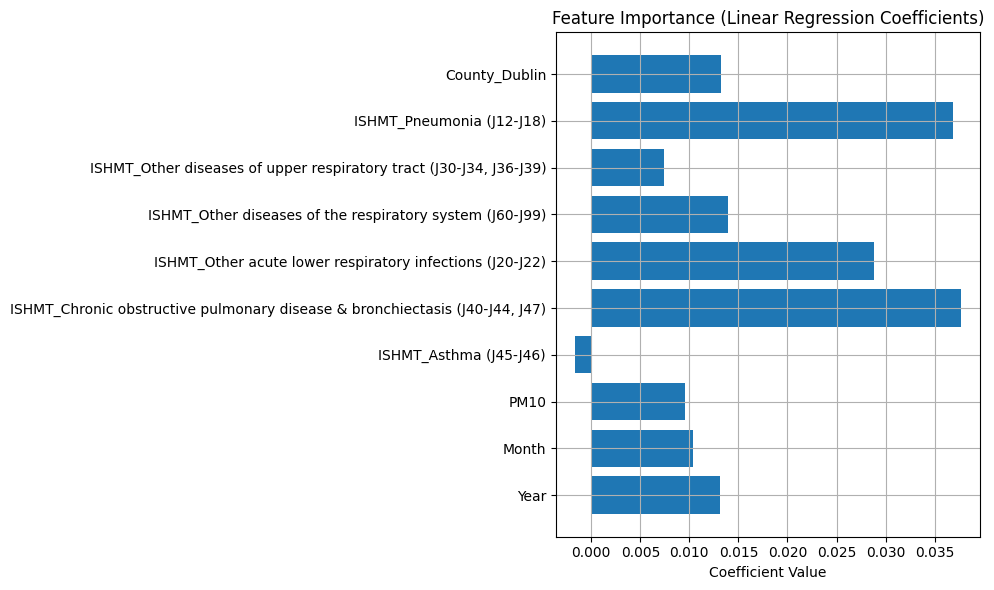

In [14]:
#feature importance from linear regression
feature_names = X.columns
coefficients = model_post.coef_

#show it on a plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Drop the non-significant features

In [15]:
#get rid of pm2.5 and pm10 for the COVID version
mydata = mydata_post_feb2022.drop(columns=['ISHMT_Asthma (J45-J46)'])

#get rid of date it is not needed
mydata = mydata.drop(columns=['date'])

#sort X (features) and y (target)
X = mydata.drop(columns=['discharge_rate'])
y = mydata['discharge_rate']

#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalise the data - and fit to train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model
model_post_drop = LinearRegression()
model_post_drop.fit(X_train_scaled, y_train)

#predict on the test set
y_pred = model_post_drop.predict(X_test_scaled)

#evaluate the model using 'mean squared error' (mse)
mse = mean_squared_error(y_test, y_pred)

#outputs
print(f"Mean Squared Error: {mse:.5f}")
print(f"Intercept: {model_post_drop.intercept_}")
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

#keep original feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

#add intercept
X_train_sm = sm.add_constant(X_train_scaled_df)

#fit the model and print summary
ols_model_post_drop = sm.OLS(y_train, X_train_sm).fit()
print(ols_model_post_drop.summary())

Mean Squared Error: 0.00196
Intercept: 0.15313319070222176
Root Mean Squared Error (RMSE): 0.04423257597375072
Mean Absolute Error (MAE): 0.030963611801720286
                            OLS Regression Results                            
Dep. Variable:         discharge_rate   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     28.55
Date:                Sat, 17 May 2025   Prob (F-statistic):           2.87e-32
Time:                        21:30:15   Log-Likelihood:                 377.90
No. Observations:                 225   AIC:                            -735.8
Df Residuals:                     215   BIC:                            -701.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                   

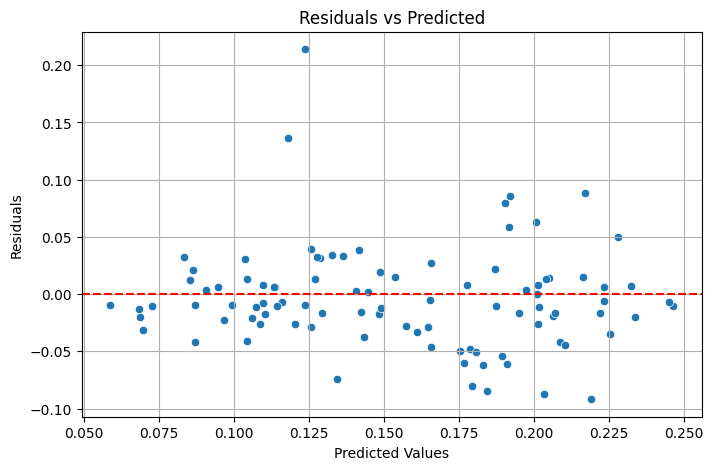

In [16]:
#look at residuals vs predicted (checking for homoscedasity and patterns)
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()


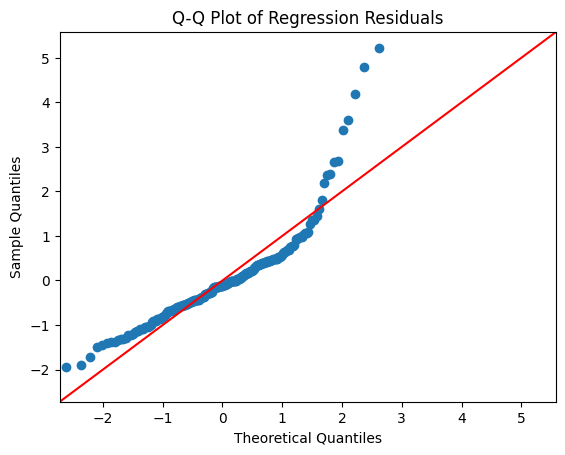

In [17]:
#qq plot of residuals
residuals = ols_model_post_drop.resid
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Regression Residuals')
plt.show()

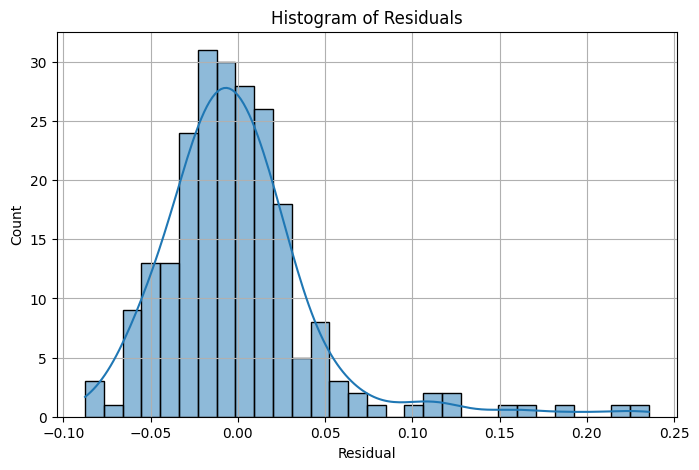

In [18]:
#plot histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.grid(True)
plt.show()


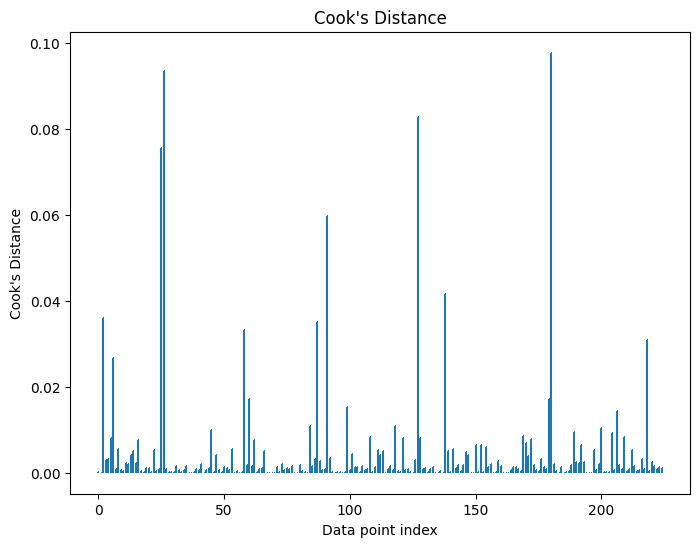

In [19]:
#add intercept
X_train_sm = sm.add_constant(X_train_scaled_df)

#fit model
ols_model_post_drop = sm.OLS(y_train, X_train_sm).fit()
influence = ols_model_post_drop.get_influence()
cooks_d = influence.cooks_distance[0]

#plot Cook's Distance
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.title("Cook's Distance")
plt.xlabel("Data point index")
plt.ylabel("Cook's Distance")
plt.show()

C:\Users\lsmyth\AppData\Local\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lsmyth\AppData\Local\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted pm10 level in 2035: -5.28
Predicted Discharge Rate in 2035: 0.41


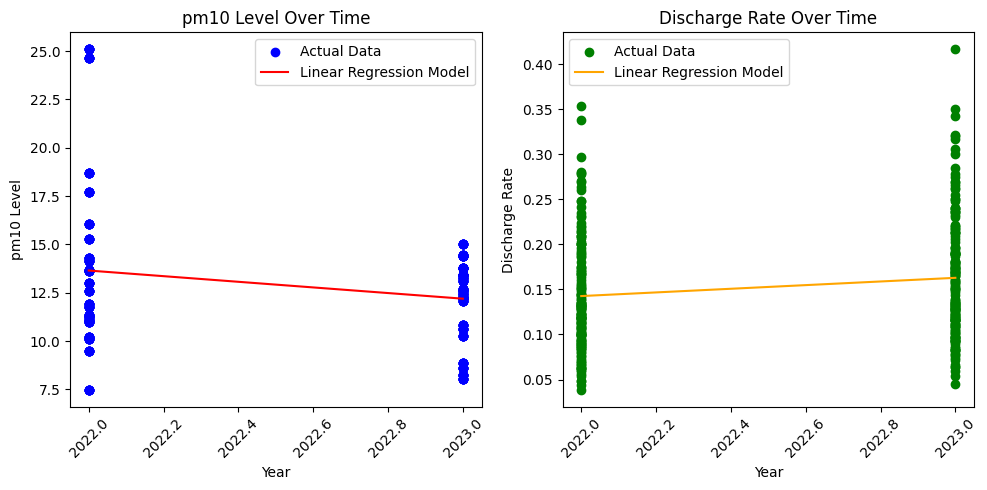

In [23]:
#features and targets (going to predict on year and look at pm10 and discharge_rate
X = mydata[['Year']]
y_pm10 = mydata['PM10']
y_discharge = mydata['discharge_rate']

#train and test split
X_train, X_test, y_train_pm10, y_test_pm10 = train_test_split(X, y_pm10, test_size=0.3, random_state=42)
X_train, X_test, y_train_discharge, y_test_discharge = train_test_split(X, y_discharge, test_size=0.3, random_state=42)

#train the model for pm10
pm10_model = LinearRegression()
pm10_model.fit(X_train, y_train_pm10)

#train the model for discharge_rate
discharge_model = LinearRegression()
discharge_model.fit(X_train, y_train_discharge)

#predict for 2035
year_2035 = np.array([[2035]])
pm10_2035 = pm10_model.predict(year_2035)
discharge_2035 = discharge_model.predict(year_2035)

#print predictions
print(f"Predicted pm10 level in 2035: {pm10_2035[0]:.2f}")
print(f"Predicted Discharge Rate in 2035: {discharge_2035[0]:.2f}")

#plot
plt.figure(figsize=(10, 5))

#pm10 prediction plot
plt.subplot(1, 2, 1)
plt.scatter(mydata['Year'], mydata['PM10'], color='blue', label='Actual Data')
plt.plot(mydata['Year'], pm10_model.predict(mydata[['Year']]), color='red', label='Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('pm10 Level')
plt.title('pm10 Level Over Time')
plt.xticks(rotation=45)
plt.legend()

#discharge_rate prediction plot
plt.subplot(1, 2, 2)
plt.scatter(mydata['Year'], mydata['discharge_rate'], color='green', label='Actual Data')
plt.plot(mydata['Year'], discharge_model.predict(mydata[['Year']]), color='orange', label='Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Discharge Rate')
plt.title('Discharge Rate Over Time')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Don't separate for COVID

In [24]:
mydata_model_tog = mydata_2022_encoded

#get rid of date it is not needed
mydata_model_tog = mydata_model_tog.drop(columns=['date'])

#sort X (features) and y (target)
X = mydata_model_tog.drop(columns=['discharge_rate'])
y = mydata_model_tog['discharge_rate']

#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalise the data - and fit to train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model
model_full = LinearRegression()
model_full.fit(X_train_scaled, y_train)

#predict on the test set
y_pred = model_full.predict(X_test_scaled)

#evaluate the model using 'mean squared error' (mse)
mse = mean_squared_error(y_test, y_pred)

#outputs
print(f"Mean Squared Error: {mse:.5f}")
print(f"Intercept: {model_full.intercept_}")
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

#keep original feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

#add intercept
X_train_sm = sm.add_constant(X_train_scaled_df)

#fit the model and print summary
ols_model_full = sm.OLS(y_train, X_train_sm).fit()
print(ols_model_full.summary())

Mean Squared Error: 0.00258
Intercept: 0.1331057683610459
Root Mean Squared Error (RMSE): 0.050833211009062886
Mean Absolute Error (MAE): 0.03407591880951785
                            OLS Regression Results                            
Dep. Variable:         discharge_rate   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     47.34
Date:                Sat, 17 May 2025   Prob (F-statistic):           2.98e-62
Time:                        21:32:47   Log-Likelihood:                 693.17
No. Observations:                 421   AIC:                            -1364.
Df Residuals:                     410   BIC:                            -1320.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    

In [27]:
#get rid of pm10 
mydata_model_tog = mydata_2022_encoded.drop(columns=['PM10','ISHMT_Asthma (J45-J46)'])

#get rid of date it is not needed
mydata_model_tog = mydata_model_tog.drop(columns=['date'])

#sort X (features) and y (target)
X = mydata_model_tog.drop(columns=['discharge_rate'])
y = mydata_model_tog['discharge_rate']

#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalise the data - and fit to train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model
model_full = LinearRegression()
model_full.fit(X_train_scaled, y_train)

#predict on the test set
y_pred = model_full.predict(X_test_scaled)

#evaluate the model using 'mean squared error' (mse)
mse = mean_squared_error(y_test, y_pred)

#outputs
print(f"Mean Squared Error: {mse:.5f}")
print(f"Intercept: {model_full.intercept_}")
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

#keep original feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

#add intercept
X_train_sm = sm.add_constant(X_train_scaled_df)

#fit the model and print summary
ols_model_full_drop = sm.OLS(y_train, X_train_sm).fit()
print(ols_model_full_drop.summary())

Mean Squared Error: 0.00268
Intercept: 0.1331057683610459
Root Mean Squared Error (RMSE): 0.05180792434694623
Mean Absolute Error (MAE): 0.035530544235972385
                            OLS Regression Results                            
Dep. Variable:         discharge_rate   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     58.13
Date:                Sat, 17 May 2025   Prob (F-statistic):           5.81e-63
Time:                        21:33:32   Log-Likelihood:                 690.63
No. Observations:                 421   AIC:                            -1363.
Df Residuals:                     412   BIC:                            -1327.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                    

In [28]:
#compare models
models = {
    "Model Covid": ols_model_pre,
    "Model Covid Reduced": ols_model_pre_drop,
    "Model Post Covid": ols_model_post,
    "Model Post Covid Reduced": ols_model_post_drop,
    "Model Full": ols_model_full,
    "Model Full Reduced": ols_model_full_drop
}

results = []

for name, model in models.items():
    results.append({
        'Model': name,
        'R-squared': model.rsquared,
        'Adj. R-squared': model.rsquared_adj,
        'AIC': model.aic,
        'BIC': model.bic,
        'F-statistic': model.fvalue,
        'F-test p-value': model.f_pvalue
    })

df_results = pd.DataFrame(results)
print(df_results.sort_values(by='Adj. R-squared', ascending=False))

                      Model  R-squared  Adj. R-squared          AIC          BIC  F-statistic  F-test p-value
1       Model Covid Reduced   0.582611        0.562415  -639.961731  -607.180585    28.847514    5.768681e-31
0               Model Covid   0.583958        0.561470  -638.595355  -602.536094    25.966696    2.396537e-30
3  Model Post Covid Reduced   0.544434        0.525364  -735.791978  -701.630974    28.548957    2.867830e-32
4                Model Full   0.535860        0.524540 -1364.334079 -1319.865118    47.335437    2.981259e-62
2          Model Post Covid   0.544783        0.523512  -733.964505  -696.387401    25.610587    1.462607e-31
5        Model Full Reduced   0.530228        0.521106 -1363.255960 -1326.872265    58.127587    5.805009e-63


In [29]:
print(ols_model_full_drop.params)

const                                                                          0.133106
Year                                                                           0.024781
Month                                                                          0.010096
ISHMT_Chronic obstructive pulmonary disease & bronchiectasis (J40-J44, J47)    0.038345
ISHMT_Other acute lower respiratory infections (J20-J22)                       0.020399
ISHMT_Other diseases of the respiratory system (J60-J99)                       0.018764
ISHMT_Other diseases of upper respiratory tract (J30-J34, J36-J39)             0.011335
ISHMT_Pneumonia (J12-J18)                                                      0.039237
County_Dublin                                                                  0.012823
dtype: float64


In [30]:
#create model equation function
def print_model_equation(model, model_name="Model"):
    terms = [f"{coef:.4f}*{var}" if var != 'const' else f"{coef:.4f}"
             for var, coef in model.params.items()]
    equation = " + ".join(terms)
    print(f"{model_name}: discharge_rate = {equation}")
    print('\n')

In [31]:
#print equations
print_model_equation(ols_model_pre, "Model Covid")
print_model_equation(ols_model_pre_drop, "Model Covid Reduced")
print_model_equation(ols_model_post, "Model Post Covid")
print_model_equation(ols_model_post_drop, "Model Post Covid Reduced")
print_model_equation(ols_model_full, "Model Full Dataset")
print_model_equation(ols_model_full_drop, "Model Full Dataset Reduced")

Model Covid: discharge_rate = 0.1180 + 0.0175*Year + 0.0145*Month + -0.0029*PM10 + 0.0162*ISHMT_Asthma (J45-J46) + 0.0478*ISHMT_Chronic obstructive pulmonary disease & bronchiectasis (J40-J44, J47) + 0.0240*ISHMT_Other acute lower respiratory infections (J20-J22) + 0.0359*ISHMT_Other diseases of the respiratory system (J60-J99) + 0.0200*ISHMT_Other diseases of upper respiratory tract (J30-J34, J36-J39) + 0.0549*ISHMT_Pneumonia (J12-J18) + 0.0124*County_Dublin


Model Covid Reduced: discharge_rate = 0.1180 + 0.0164*Year + 0.0151*Month + 0.0159*ISHMT_Asthma (J45-J46) + 0.0474*ISHMT_Chronic obstructive pulmonary disease & bronchiectasis (J40-J44, J47) + 0.0236*ISHMT_Other acute lower respiratory infections (J20-J22) + 0.0354*ISHMT_Other diseases of the respiratory system (J60-J99) + 0.0196*ISHMT_Other diseases of upper respiratory tract (J30-J34, J36-J39) + 0.0546*ISHMT_Pneumonia (J12-J18) + 0.0122*County_Dublin


Model Post Covid: discharge_rate = 0.1531 + 0.0131*Year + 0.0103*Month + 0.